## Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
#plt.style.use('fivethirtyeight')

## Overview

In [4]:
df = pd.read_csv('Dataset-Tugas.csv')
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Pada kolom class memiliki 3 target, yaitu `Iris-sentosa`, `Iris-versicolor`, dan `Iris-virginica` yang masing-masing berjumlah 50. Karena masih dalam bentuk object, maka kita drop

In [7]:
df.drop(columns='class', inplace=True)

## Exploratory Data Analysis

In [8]:
df.shape

(150, 4)

Terdapat 150 column dan 4 tabel yang terdapat pada data ini

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

Tidak terdapat data yang kosong , sehingga kita tidak perlu melakukan handling missing values

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


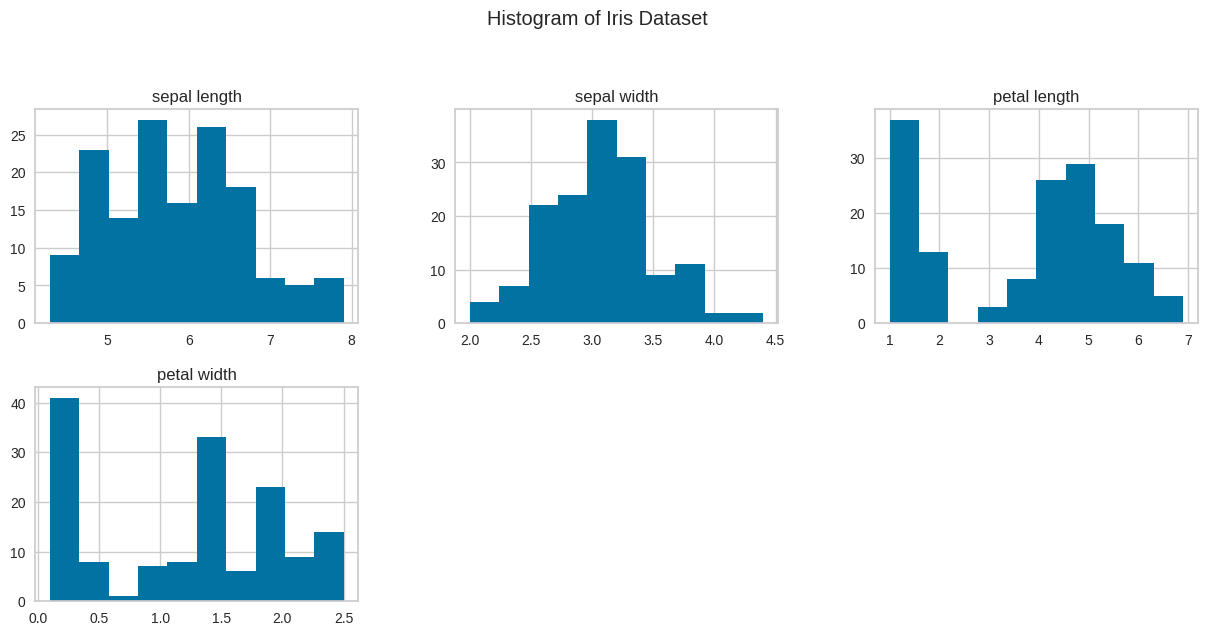

In [12]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3))
    plt.suptitle("Histogram of Iris Dataset")
    plt.show()

plot_histograms(df)

Dari histogram terlihat bahwa distribusi dari kolom tidak berdistribusi normal. Oleh karena itu, kita perlu lakukan normalisasi supaya skala datanya sama

In [13]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

outlier_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_iqr(df[col])

outliers_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outliers Count'])

outliers_counts_df

,Column,Outliers Count
0,sepal length,0
1,sepal width,4
2,petal length,0
3,petal width,0


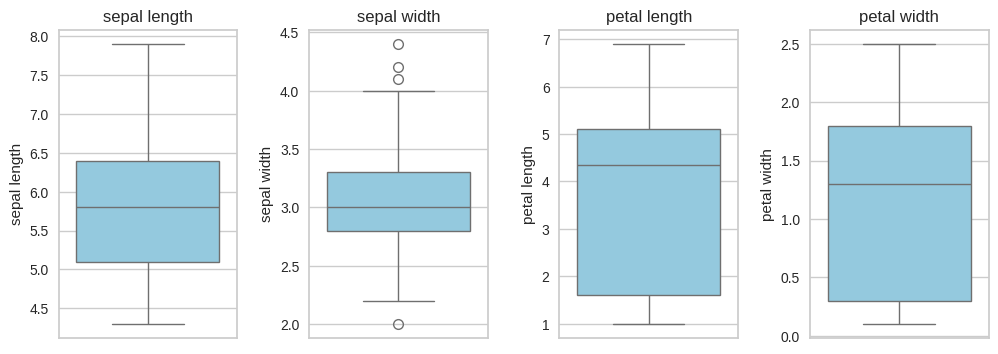

In [14]:
def box_plot(df):
  variables = df.select_dtypes(exclude = 'object').columns
  fig, axes = plt.subplots(1, 4, figsize = (12, 4)) 
  fig.subplots_adjust(hspace = 0.4, wspace = 0.4) 

  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=df, color = "skyblue", ax=axes[i])
    axes[i].set_title(var)

  plt.show()

box_plot(df)

Terlihat dari boxplot pada kolom `sepal width` terdapat outliers yang berjumlah 4

## Preprocessing

In [15]:
scaler = MinMaxScaler()

x = scaler.fit_transform(df)

Menggunakan MinMaxScaler karena akan mengubah skala datanya menjadi 0 - 1

## Modelling

### K-Means

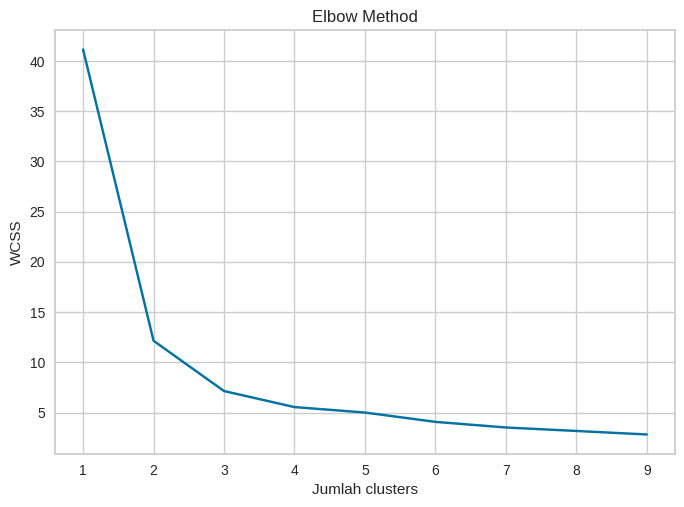

In [16]:
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Penentuan jumlah cluster berdasarkan angle yang berubah di elbow method. Dari elbow method diatas jumlah cluster yang bisa digunakan yaitu 2 cluster atau 3 cluster

In [17]:
km2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred_km2 = km2.fit_predict(x)

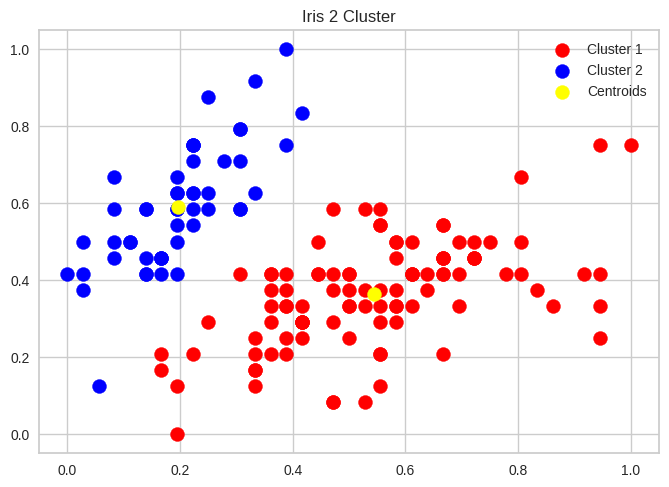

In [18]:
plt.scatter(x[y_pred_km2 == 0, 0], x[y_pred_km2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_pred_km2 == 1, 0], x[y_pred_km2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Iris 2 Cluster')
plt.legend()
plt.show()

In [19]:
df['Label_K-Means2'] = km2.labels_
df.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [35]:
df['Label_K-Means2'].value_counts()

Label_K-Means2
0    100
1     50
Name: count, dtype: int64

In [20]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred_km = km.fit_predict(x)

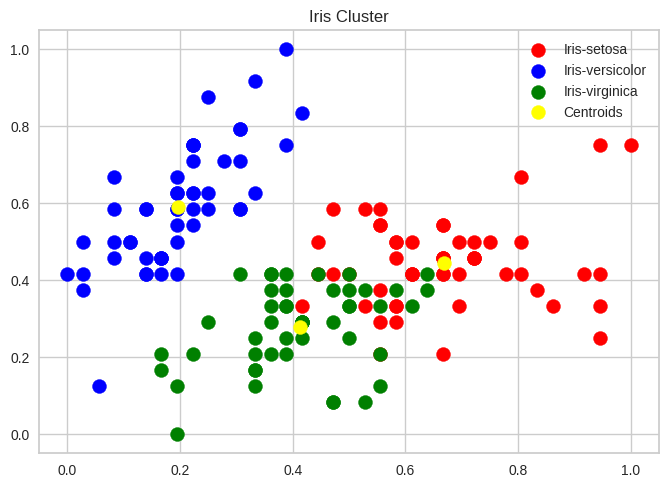

In [21]:
plt.scatter(x[y_pred_km == 0, 0], x[y_pred_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred_km == 1, 0], x[y_pred_km == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_pred_km == 2, 0], x[y_pred_km == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Iris Cluster')
plt.legend()
plt.show()

In [22]:
df['Label_K-Means'] = km.labels_
df.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2,Label_K-Means
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [23]:
df['Label_K-Means'].value_counts()

Label_K-Means
0    52
1    50
2    48
Name: count, dtype: int64

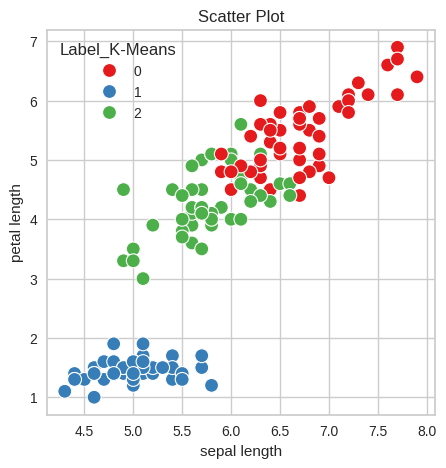

In [24]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'sepal length', y = 'petal length', hue = 'Label_K-Means', data = df, palette = 'Set1', s=100);
plt.title("Scatter Plot")
plt.show()

### DBSCAN

In [25]:
db = DBSCAN(eps=0.4, min_samples=5)
db.fit(x)

y_pred_db = db.labels_

In [26]:
y_pred_db

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
df['Label_DB-Scan'] = db.labels_
df.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,1,0
1,4.9,3.0,1.4,0.2,1,1,0
2,4.7,3.2,1.3,0.2,1,1,0
3,4.6,3.1,1.5,0.2,1,1,0
4,5.0,3.6,1.4,0.2,1,1,0


In [28]:
df['Label_DB-Scan'].value_counts()

Label_DB-Scan
1    100
0     50
Name: count, dtype: int64

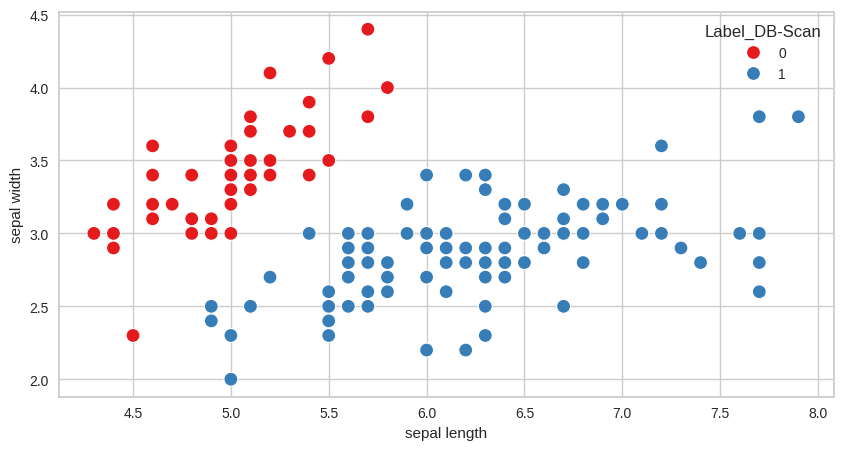

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'sepal length', y = 'sepal width', hue = 'Label_DB-Scan', data = df, palette = 'Set1', s=100);

## Evaluation

### K-Means

In [30]:
e_km2 = silhouette_score(x, y_pred_km2)
dbi_km2 = davies_bouldin_score(x, y_pred_km2)

print('Silhouette Score K-Means 2 Cluster:', e_km2)
print('Davies-Bouldin Index K-Means 2 Cluster:', dbi_km2)

Silhouette Score K-Means 2 Cluster: 0.6294675561906644
Davies-Bouldin Index K-Means 2 Cluster: 0.48770481288357487


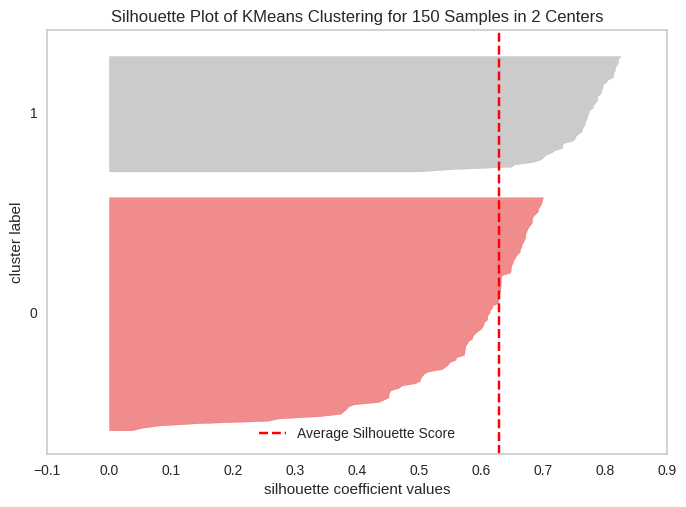

In [31]:
silhouette_viz = SilhouetteVisualizer(km2)
silhouette_viz.fit(x)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [32]:
e_km = silhouette_score(x, y_pred_km)
dbi_km = davies_bouldin_score(x, y_pred_km)

print('Silhouette Score K-Means 3 Cluster:', e_km)
print('Davies-Bouldin Index K-Means 3 Cluster 3:', dbi_km)

Silhouette Score K-Means 3 Cluster: 0.48247222154221125
Davies-Bouldin Index K-Means 3 Cluster 3: 0.7874978912757878


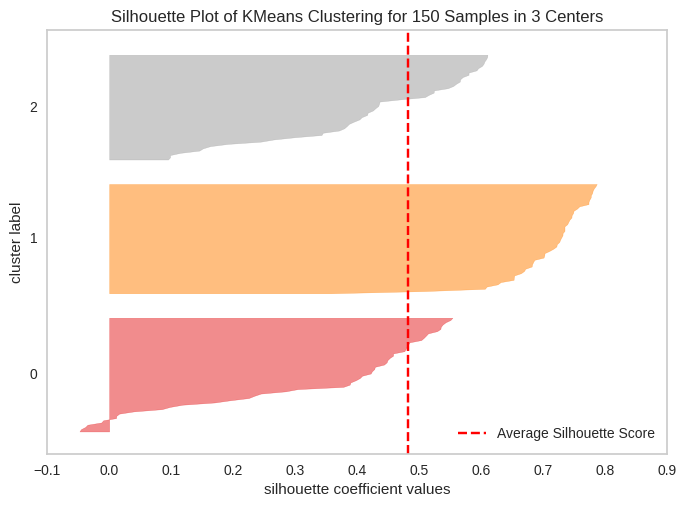

In [33]:
silhouette_viz = SilhouetteVisualizer(km)
silhouette_viz.fit(x)
plt.grid(False)
silhouette_viz.show()
plt.show()

### DBSCAN

In [34]:
e_db = silhouette_score(x, y_pred_db)
dbi_db = davies_bouldin_score(x, y_pred_db)

print('Silhouette Score DBSCAN:', e_db)
print('Davies-Bouldin Index DBSCAN:', dbi_db)

Silhouette Score DBSCAN: 0.6294675561906644
Davies-Bouldin Index DBSCAN: 0.48770481288357487
